# DESAFIO ESTÁGIO DATA ENGINEERING
### Load Data TSVs

In [1]:
#Import the dataset into a pandas dataframe using the read_table method.
import pandas as pd

# usei utf8 para corrigir a leitura dos acentos
# tsv é separado por tab
deals = pd.read_csv('/home/brunocampos01/projetos/challenges/indicium/deals.tsv', sep='\t',
                 encoding='utf-8')
sectors = pd.read_csv('/home/brunocampos01/projetos/challenges/indicium/sectors.tsv', sep='\t',
                 encoding='utf-8')
companies = pd.read_csv('/home/brunocampos01/projetos/challenges/indicium/companies.tsv', sep='\t',
                 encoding='utf-8')
contacts = pd.read_csv('/home/brunocampos01/projetos/challenges/indicium/contacts.tsv', sep='\t',
                 encoding='utf-8')

### Análise e limpeza dos dados

In [2]:
deals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
dealsId             100 non-null int64
dealsDateCreated    100 non-null object
dealsPrice          100 non-null int64
contactsId          100 non-null int64
companiesId         100 non-null int64
dtypes: int64(4), object(1)
memory usage: 4.0+ KB


In [3]:
sectors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
sectorKey    6 non-null int64
sector       6 non-null object
dtypes: int64(1), object(1)
memory usage: 176.0+ bytes


In [4]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 10 columns):
companiesId             74 non-null int64
companiesName           74 non-null object
companiesDateCreated    74 non-null object
createdBy               74 non-null object
companiesEmails         74 non-null object
companiesPhones         74 non-null object
employeesId             74 non-null int64
employeesName           74 non-null object
usersResponsible        74 non-null object
sectorKey               74 non-null int64
dtypes: int64(3), object(7)
memory usage: 5.9+ KB


In [5]:
contacts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 12 columns):
 contactsId              74 non-null int64
contactsName             74 non-null object
contactsDateCreated      74 non-null object
contactsCreatedBy        74 non-null object
contactsEmails           74 non-null object
contactsPhones           74 non-null object
contactsEmployers        74 non-null object
employersId              74 non-null int64
contactsHomeAdress       74 non-null object
contactsLatLong          74 non-null object
contactsRelatedToLead    74 non-null int64
contactsResponsible      74 non-null object
dtypes: int64(3), object(9)
memory usage: 7.0+ KB


### Há um espaço em branco no metadado da primeira coluna da tabela _contacts_

In [6]:
#contacts.rename(str.strip, axis='columns')
#contacts.rename(index=str, columns={" contactsId": "contactsId"})

# renomeei cada coluna para garantir que não há espaços em branco
contacts.columns = ['contactsId', 'contactsName', 'contactsDateCreated', 'contactsCreatedBy',
                    'contactsEmails', 'contactsPhones', 'contactsEmployers', 'employersId', 
                    'contactsHomeAdress', 'contactsLatLong', 'contactsRelatedToLead', 'contactsResponsible']
print(contacts.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 12 columns):
contactsId               74 non-null int64
contactsName             74 non-null object
contactsDateCreated      74 non-null object
contactsCreatedBy        74 non-null object
contactsEmails           74 non-null object
contactsPhones           74 non-null object
contactsEmployers        74 non-null object
employersId              74 non-null int64
contactsHomeAdress       74 non-null object
contactsLatLong          74 non-null object
contactsRelatedToLead    74 non-null int64
contactsResponsible      74 non-null object
dtypes: int64(3), object(9)
memory usage: 7.0+ KB
None


### Conversão de tipos (date)

In [7]:
deals['dealsDateCreated'] = pd.to_datetime(deals['dealsDateCreated'])
deals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
dealsId             100 non-null int64
dealsDateCreated    100 non-null datetime64[ns]
dealsPrice          100 non-null int64
contactsId          100 non-null int64
companiesId         100 non-null int64
dtypes: datetime64[ns](1), int64(4)
memory usage: 4.0 KB


In [8]:
contacts['contactsDateCreated'] = pd.to_datetime(contacts['contactsDateCreated'])
contacts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 12 columns):
contactsId               74 non-null int64
contactsName             74 non-null object
contactsDateCreated      74 non-null datetime64[ns]
contactsCreatedBy        74 non-null object
contactsEmails           74 non-null object
contactsPhones           74 non-null object
contactsEmployers        74 non-null object
employersId              74 non-null int64
contactsHomeAdress       74 non-null object
contactsLatLong          74 non-null object
contactsRelatedToLead    74 non-null int64
contactsResponsible      74 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 7.0+ KB


In [9]:
companies['companiesDateCreated'] = pd.to_datetime(companies['companiesDateCreated'])
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 10 columns):
companiesId             74 non-null int64
companiesName           74 non-null object
companiesDateCreated    74 non-null datetime64[ns]
createdBy               74 non-null object
companiesEmails         74 non-null object
companiesPhones         74 non-null object
employeesId             74 non-null int64
employeesName           74 non-null object
usersResponsible        74 non-null object
sectorKey               74 non-null int64
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 5.9+ KB


### Valores inválidos

In [10]:
# Não é possível haver dealsDateCreated, contactsDateCreated e companiesDateCreated no futuro
# Então, me basendo na data que recebi o desafio '2018-10-09' para ser o fator seletivo

# drop de linhas inválidas em deals
deals = deals[deals.dealsDateCreated < "2018-10-09"]
print(f'Número de linhas descartadas em deals: {100 - len(deals)}')

# drop de linhas inválidas em contacts
contacts = contacts[contacts.contactsDateCreated < "2018-10-09"]
print(f'Número de linhas descartadas em contacts: {74 - len(contacts)}')

# drop de linhas inválidas em companies
companies = companies[companies.companiesDateCreated < "2018-10-09"]
print(f'Número de linhas descartadas em companies: {74 - len(companies)}')

Número de linhas descartadas em deals: 45
Número de linhas descartadas em contacts: 26
Número de linhas descartadas em companies: 26


---

# Visualização dos dados

### Join entre as tabels _deals_ e _contacts_

In [11]:
# O join vai servir para mapear o nome dos contacts
# vai auxiliar na exibição do gráfico com os nomes dos contacts

colunas_necessarias_contacts = ['contactsId','contactsName', 'contactsDateCreated' ]
deals_contacts = pd.merge(deals, contacts[colunas_necessarias_contacts], left_on='contactsId', right_on='contactsId')
deals_contacts

,dealsId,dealsDateCreated,dealsPrice,contactsId,companiesId,contactsName,contactsDateCreated
0,10,2018-09-08,8880,11,29,Craig Boyd,2018-05-30
1,5,2017-11-20,5030,11,28,Craig Boyd,2018-05-30
2,7,2017-09-02,600,11,11,Craig Boyd,2018-05-30
3,42,2017-12-26,2560,11,11,Craig Boyd,2018-05-30
4,18,2018-04-05,3930,30,30,Cooper Sandoval,2018-03-31
5,24,2018-01-01,3480,15,19,Jonah Day,2018-02-18
6,20,2017-10-09,2380,15,19,Jonah Day,2018-02-18
7,16,2018-05-04,6330,15,19,Jonah Day,2018-02-18
8,45,2018-02-17,8890,15,19,Jonah Day,2018-02-18
9,33,2018-05-12,7130,15,19,Jonah Day,2018-02-18


In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

# para visualizar de forma ampla
plt.rcParams['figure.figsize'] = (15, 8)

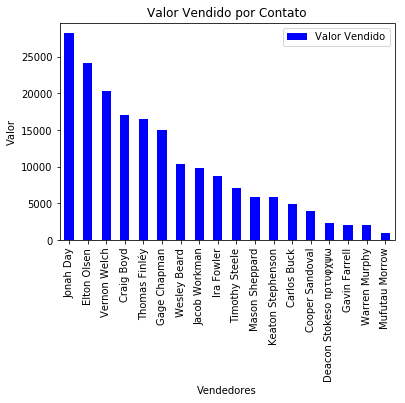

In [13]:
# organização dos dados
n_vendas_contato = deals_contacts.groupby('contactsName')['dealsPrice'].sum().sort_values(ascending=False)

# visualização do gráfico
n_vendas_contato = n_vendas_contato.plot(kind='bar', color='blue', label='Valor Vendido')

plt.xlabel('Vendedores')
plt.ylabel('Valor')
plt.title("Valor Vendido por Contato")
plt.legend(loc="upper right")
plt.legend()
plt.show()

In [14]:
# organização dos dados - valor total vendido por mês
extrai_mes = pd.DatetimeIndex(deals['dealsDateCreated']).month
n_vendas_mes = deals.groupby(extrai_mes)['dealsPrice'].sum()

# para renomear as colunas do gráfico sera necessário renomear os índices do df n_vendas_mes
n_vendas_mes = n_vendas_mes.rename(index={1:"janeiro", 2:"fevereiro", 3:"março", 4:"abril",
        5:"maio", 6:"junho", 7:"julho", 8:"agosto", 9:"setembro", 10:"outubro", 11:"novembro", 12:"dezembro"})

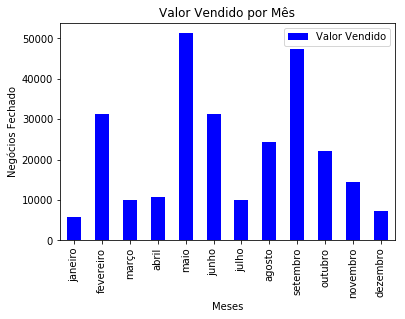

In [15]:
# visualização do gráfico
n_vendas_mes_grafico = n_vendas_mes.plot(kind='bar', color='blue', label='Valor Vendido')

plt.xlabel('Meses')
plt.ylabel('Negócios Fechado')
plt.title("Valor Vendido por Mês")
plt.legend(loc="upper right")
plt.legend()
plt.show()

---

# Lista das vendas por setores ordenado pelo mês

In [16]:
# O join vai servir para mapear o nome dos sectors
colunas_necessarias_companies = ['companiesId','companiesDateCreated', 'sectorKey' ]
companies_sectors = pd.merge(companies[colunas_necessarias_companies], sectors, left_on='sectorKey', right_on='sectorKey')

# join entre deals e companies_sectors
deals_companies_sectors = pd.merge( deals, companies_sectors, left_on='companiesId', right_on='companiesId')
deals_companies_sectors

,dealsId,dealsDateCreated,dealsPrice,contactsId,companiesId,companiesDateCreated,sectorKey,sector
0,10,2018-09-08,8880,11,29,2018-05-30,4,Indústria
1,18,2018-04-05,3930,30,30,2018-03-31,3,Tecnologia
2,24,2018-01-01,3480,15,19,2018-02-18,4,Indústria
3,20,2017-10-09,2380,15,19,2018-02-18,4,Indústria
4,16,2018-05-04,6330,15,19,2018-02-18,4,Indústria
5,45,2018-02-17,8890,15,19,2018-02-18,4,Indústria
6,33,2018-05-12,7130,15,19,2018-02-18,4,Indústria
7,36,2017-10-23,7660,74,74,2017-12-04,6,Atacado
8,76,2017-12-20,1980,74,74,2017-12-04,6,Atacado
9,79,2018-02-22,5400,74,74,2017-12-04,6,Atacado


In [44]:
# nesta lista vou armazenar o valor total vendido por mês, separado por setor
list_dealsPrice_sector = []


for i in sectors['sector']:
    print(i)
# query para selecionar o setor
query_sector = deals_companies_sectors[deals_companies_sectors['sector'] == "Bens de Consumo"]

# query para selecionar o mes a partir do setor
query_sector_month = query_sector[(query_sector['dealsDateCreated'].dt.month== 3)]

# group by dealsPrice
grouping_sector_month = query_sector_month.groupby('sector')['dealsPrice'].sum().sort_values(ascending=False)
list_dealsPrice_sector.append(grouping_sector_month)
print(list_dealsPrice_sector)



df = pd.DataFrame({'B': [1, 2, 3], 'C': [4, 5, 6]})

idx = 0
new_col = [7, 8, 9]  # can be a list, a Series, an array or a scalar   
df.insert(loc=idx, column='Mês', value=new_col)

writer_data(df)

Bens de Consumo
Serviços
Tecnologia
Indústria
Varejo
Atacado
[Series([], Name: dealsPrice, dtype: int64)]


In [487]:
# nestes dataframes vou armazenar o valor total vendido por mês, separado por setor
grouping_sector_month = pd.DataFrame(columns=['Mês', 'Setor', 'Valor Total'])
df_setores = pd.DataFrame()
lista_mes = pd.DataFrame()


for i in sectors['sector']: 
    # query para selecionar o setor
    query_sector = pd.DataFrame(deals_companies_sectors[deals_companies_sectors['sector'] == i])

    for j in range(1,13):
        # query para selecionar o mes a partir do setor
        query_sector_month = pd.DataFrame(query_sector[(query_sector['dealsDateCreated'].dt.month== j)])

        # group by dealsPrice
        grouping = pd.DataFrame(query_sector_month.groupby('sector')
                                ['dealsPrice'].sum().sort_values(ascending=False))       
        
        # se houver dealsPrice do setor i no mes j, então insira no dataframe grouping_sector_month
        if grouping.empty == False:   
            #grouping_sector_month.insert(loc=idx, column='Valor Total', value=grouping_sector_month)
            #grouping_sector_month = grouping_sector_month.append(grouping_sector_month)
            #print(i)
            #print(j)
            None
            
            
            grouping = grouping['dealsPrice'].values.tolist()
            # variável p organizar a inserção no dataframe grouping_sector_month
            data = pd.DataFrame([[j, i, grouping]], columns=['Mês', 'Setor', 'Valor Total'])
            grouping_sector_month = grouping_sector_month.append(data)
            

            

print(grouping_sector_month.info())
print()
#print(grouping_sector_month['Mês'])
print('-------')
print('grouping_sector_month')
print(grouping_sector_month)
print('-------')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 0
Data columns (total 3 columns):
Mês            25 non-null object
Setor          25 non-null object
Valor Total    25 non-null object
dtypes: object(3)
memory usage: 800.0+ bytes
None

-------
grouping_sector_month
  Mês       Setor Valor Total
0   3    Serviços      [9030]
0   6    Serviços     [16660]
0   8    Serviços     [14810]
0   9    Serviços      [9500]
0  11    Serviços      [2540]
0   4  Tecnologia      [3930]
0   9  Tecnologia      [5560]
0  10  Tecnologia      [2860]
0  11  Tecnologia      [5030]
0  12  Tecnologia      [2560]
0   1   Indústria      [5760]
0   2   Indústria     [10190]
0   5   Indústria     [13460]
0   9   Indústria     [19550]
0  10   Indústria      [2380]
0   2      Varejo      [4380]
0   3      Varejo       [990]
0   5      Varejo      [8680]
0  11      Varejo      [1470]
0   2     Atacado      [5400]
0   5     Atacado      [6840]
0   6     Atacado      [9590]
0   9     Atacado      [49

In [110]:
# Grava a lista list_dealsPrice_sector no arquivo output.csv
import csv

def writer_data (lista):
    with open("/home/brunocampos01/projetos/challenges/indicium/output.csv", "w") as myfile:
        for entries in list_dealsPrice_sector:
            fieldnames = ['Mês', 'Setor', 'DealsPrice Total']
            writer = csv.writer(myfile, quoting=csv.QUOTE_ALL )
            writer.writerow(lista_colunas)
            writer.writeheader()

In [133]:
import csv

lista_colunas = ['Mês', 'Setor', 'DealsPrice Total']

print(lista_colunas)


with open("/home/brunocampos01/projetos/challenges/indicium/output.csv", "w") as myfile:
    fieldnames = ['Mês', 'Setor', 'DealsPrice Total']
    writer = csv.DictWriter(myfile, fieldnames=fieldnames)

    writer.writeheader()
    writer.writerow({'Mês': lista_mes, 'Setor': lista_setores, 'DealsPrice Total': lista_dealsPrice_sector})

    list_dealsPrice_sector
    

['Mês', 'Setor', 'DealsPrice Total']
